In [1]:
# loading packages
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from tqdm.notebook import tqdm_notebook
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# loading train dataset
train_df = pd.read_csv(r'D:\Purity\Hackathon\DatasourceAI\creditcard_fraud detection\Train (9).csv')
# train dataset shape
print(train_df.shape)
# checking for duplicates
print(train_df.id.unique().shape)
# train data set
train_df.head()

(142403, 32)
(142403,)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,1,68060.0,-4.565781,2.891870,-1.505909,-0.609598,-0.684404,-0.417628,0.093167,1.017300,...,-0.295050,-0.599263,-0.484981,-0.994767,1.120258,0.481573,0.055996,0.500978,43.92,0
1,2,88766.0,-1.932119,0.463690,-1.171450,-0.549980,1.710455,-1.030608,1.084965,-0.275486,...,-0.419797,-0.335424,0.548648,0.172697,-0.291240,0.275663,0.269275,0.667690,14.17,0
2,3,151883.0,-0.657832,0.753651,1.229142,-0.180336,-0.355564,-0.479811,-0.106428,0.409319,...,0.401123,1.250059,-0.253317,0.113877,-0.235661,-0.127742,0.096903,0.095731,0.80,0
3,4,159020.0,-1.207027,1.737476,-0.948094,-0.456881,0.686600,-0.665881,0.405398,0.575671,...,0.317289,0.646278,-0.506730,-1.117083,0.500530,0.035332,-0.401375,0.004993,3.91,0
4,5,86526.0,1.974552,0.176499,-2.080724,1.149523,0.845438,-0.908770,0.815385,-0.414188,...,0.144520,0.369164,-0.033627,0.600179,0.469150,-0.512841,-0.045404,-0.048915,59.70,0


In [3]:
# loading test dataset
test_df = pd.read_csv(r'D:\Purity\Hackathon\DatasourceAI\creditcard_fraud detection\Test (9).csv')
# test dataset shape
print(test_df.shape)
# checking duplicates
print(test_df.id.unique().shape)
# test dataset
test_df.head()
                      

(71202, 31)
(71202,)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1,137258.0,1.358302,-1.182487,-2.493830,0.488218,0.258770,-0.304717,0.532905,-0.223698,...,0.620256,-0.080010,-0.870973,-0.207011,-0.134575,-0.086101,-0.113911,-0.085983,0.042750,387.50
1,2,147298.0,-1.304161,2.131949,-0.838896,3.155487,0.524203,-0.530462,0.545692,0.535868,...,-0.616521,0.506486,1.276061,-0.157185,-0.020511,-0.801740,0.070055,-1.008059,-0.402236,7.59
2,3,140451.0,-0.096751,1.162059,-0.534671,-0.604715,0.883683,-0.759341,0.934334,-0.057821,...,0.119217,-0.372934,-0.864456,0.111205,0.488024,-0.390410,0.125219,0.333239,0.142155,6.99
3,4,35801.0,-0.990465,0.759625,0.611074,0.769580,0.082927,0.011053,0.125135,0.733668,...,0.060028,0.236350,0.444033,-0.007983,-0.354241,-0.286025,-0.279814,0.281404,0.098528,50.00
4,5,131269.0,-0.920443,0.299100,-0.015312,-1.102493,1.855515,-1.945901,1.063730,-0.528711,...,-0.361849,0.209672,0.815771,-0.511291,-0.187107,-0.061418,-0.404762,-0.048434,-0.056745,15.73


In [4]:
# merging the train and test dataset for preprocessing
# Combine train and test set
ntrain = train_df.shape[0] # to be used to split train and test set from the combined dataframe

df = pd.concat((train_df, test_df)).reset_index(drop=True)
print(df.shape)
df.head()

(213605, 32)


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,1,68060.0,-4.565781,2.891870,-1.505909,-0.609598,-0.684404,-0.417628,0.093167,1.017300,...,-0.295050,-0.599263,-0.484981,-0.994767,1.120258,0.481573,0.055996,0.500978,43.92,0.0
1,2,88766.0,-1.932119,0.463690,-1.171450,-0.549980,1.710455,-1.030608,1.084965,-0.275486,...,-0.419797,-0.335424,0.548648,0.172697,-0.291240,0.275663,0.269275,0.667690,14.17,0.0
2,3,151883.0,-0.657832,0.753651,1.229142,-0.180336,-0.355564,-0.479811,-0.106428,0.409319,...,0.401123,1.250059,-0.253317,0.113877,-0.235661,-0.127742,0.096903,0.095731,0.80,0.0
3,4,159020.0,-1.207027,1.737476,-0.948094,-0.456881,0.686600,-0.665881,0.405398,0.575671,...,0.317289,0.646278,-0.506730,-1.117083,0.500530,0.035332,-0.401375,0.004993,3.91,0.0
4,5,86526.0,1.974552,0.176499,-2.080724,1.149523,0.845438,-0.908770,0.815385,-0.414188,...,0.144520,0.369164,-0.033627,0.600179,0.469150,-0.512841,-0.045404,-0.048915,59.70,0.0


In [5]:
# dropping the id column
df.drop(['id'], axis=1, inplace=True)
df.shape

(213605, 31)

In [6]:
# checking for missing variables
df.isnull().sum()

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
class     71202
dtype: int64

In [7]:
# getting summary of the numerical columns
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,...,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,213605.000000,142403.000000
mean,94779.302886,-0.006022,-0.002251,0.002638,-0.000011,0.002465,0.000466,0.000161,-0.001033,0.000547,...,-0.000756,0.000743,-0.000275,0.000569,-0.000514,0.000913,-0.000293,0.000033,88.533809,0.001727
std,47475.691360,1.962654,1.657150,1.515406,1.415401,1.382175,1.335078,1.243220,1.205121,1.097322,...,0.744279,0.727235,0.633541,0.605321,0.522182,0.483176,0.406978,0.337415,254.718510,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000,0.000000
25%,54195.000000,-0.924661,-0.599367,-0.889277,-0.848486,-0.691985,-0.768017,-0.552933,-0.207656,-0.642968,...,-0.228827,-0.542334,-0.161641,-0.353719,-0.317989,-0.326641,-0.071048,-0.053231,5.580000,0.000000
50%,84652.000000,0.009933,0.066276,0.181660,-0.021651,-0.053750,-0.274294,0.041042,0.022854,-0.049750,...,-0.029269,0.006979,-0.010948,0.041602,0.015521,-0.051191,0.001253,0.011287,22.000000,0.000000
75%,139284.000000,1.313726,0.803282,1.029999,0.743638,0.615359,0.396827,0.570695,0.327412,0.597818,...,0.186827,0.529961,0.148002,0.440749,0.350898,0.242140,0.091364,0.078480,77.100000,0.000000
max,172792.000000,2.454930,22.057729,4.101716,16.875344,34.801666,73.301626,120.589494,20.007208,10.326133,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808,25691.160000,1.000000


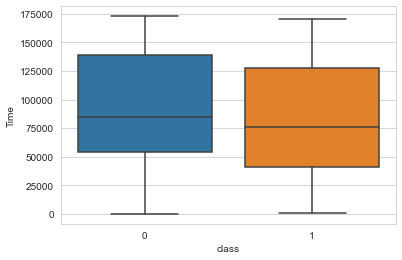

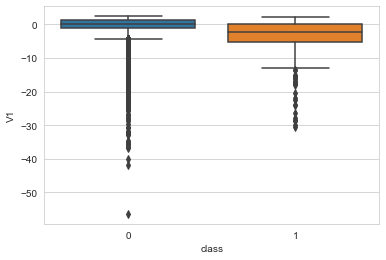

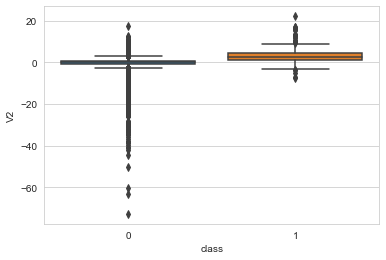

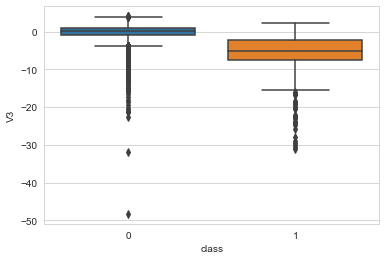

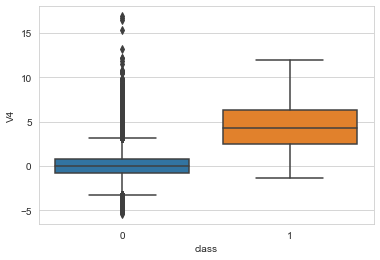

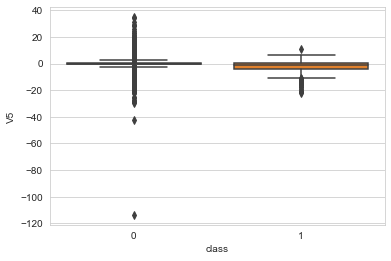

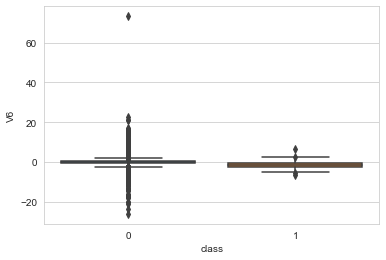

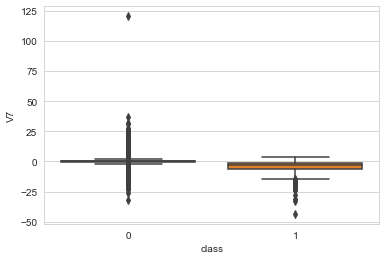

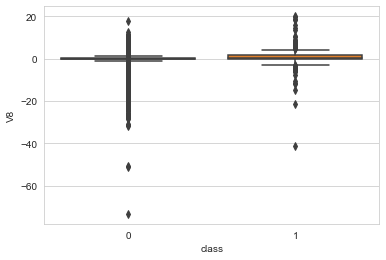

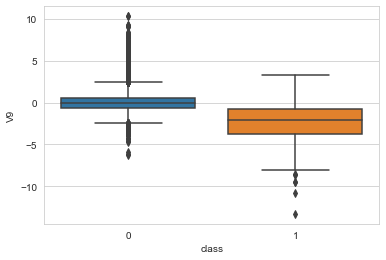

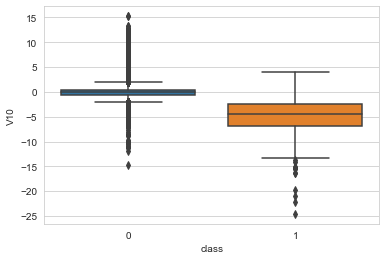

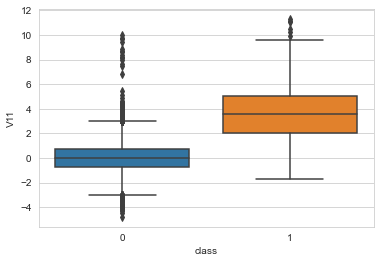

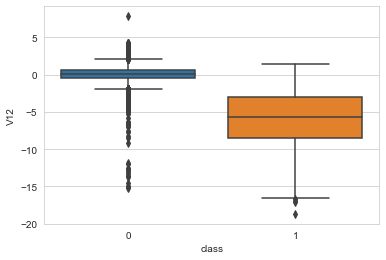

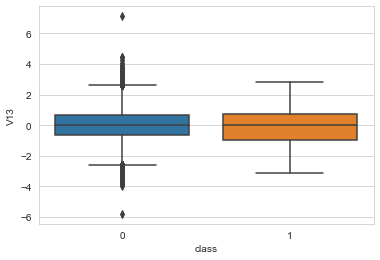

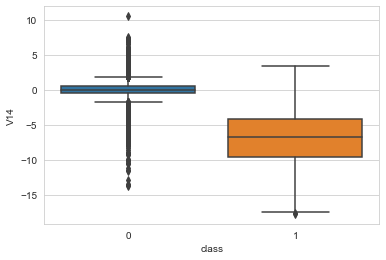

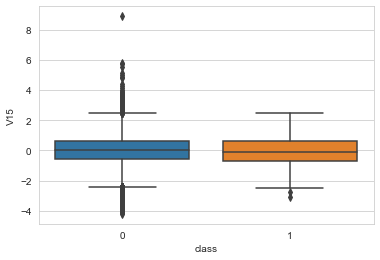

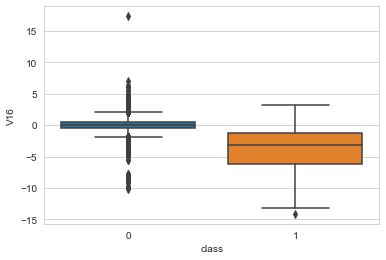

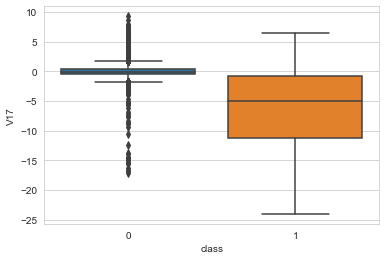

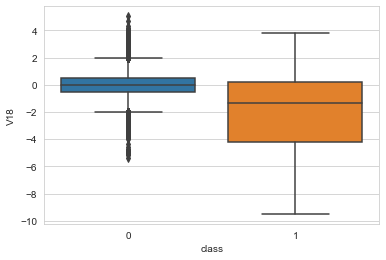

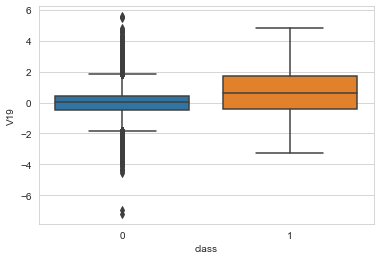

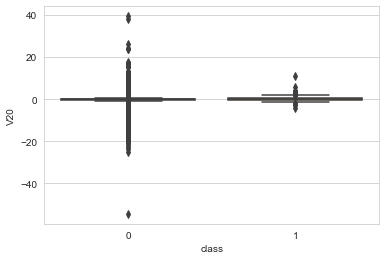

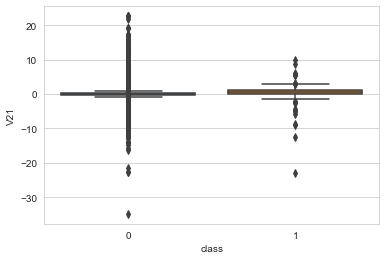

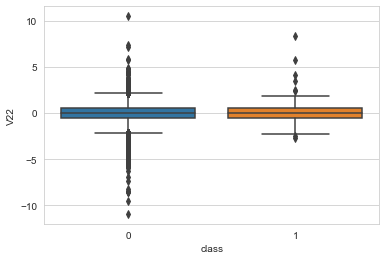

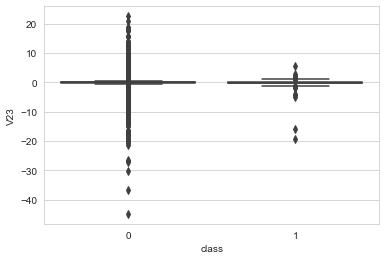

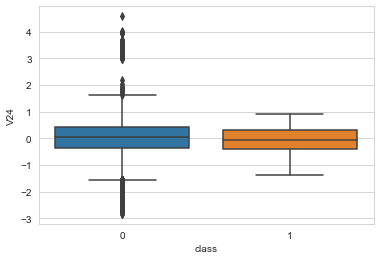

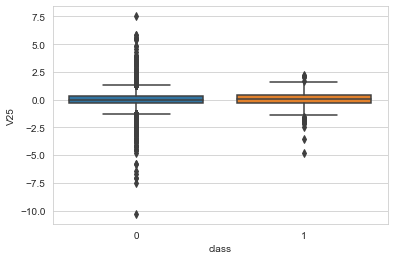

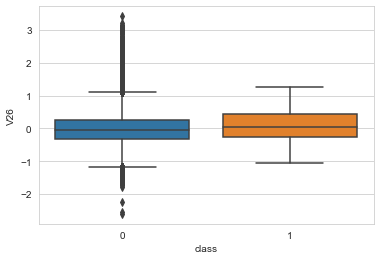

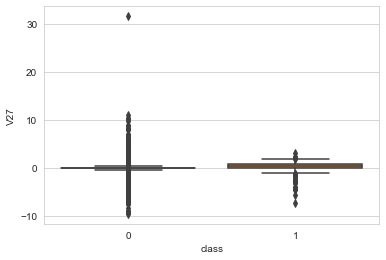

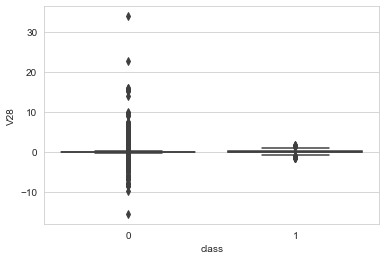

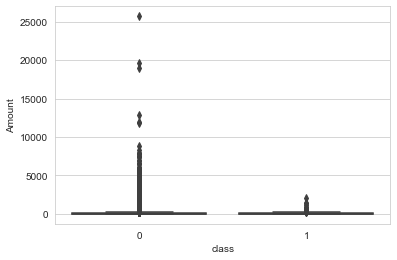

In [8]:
# visualize class separation by numeric features
def box_plot(df, cols, col_x = 'class'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
num_cols = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14',
            'V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25',
            'V26','V27','V28','Amount']
box_plot(train_df, num_cols)

In [9]:
# examining class imbalance
train_df['class'].value_counts()

0    142157
1       246
Name: class, dtype: int64

In [10]:
# oversampling the minority class
from sklearn.utils import resample

# separating minority and majority classes
not_fraud = train_df[train_df['class']==0]
fraud = train_df[train_df['class']==1]

# upsampling minority
fraud_upsampled = resample(fraud,
                           replace=True, # sample with replacement
                           n_samples=len(not_fraud), # match number in majority class
                           random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled['class'].value_counts()

1    142157
0    142157
Name: class, dtype: int64

In [11]:
upsampled.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,1,68060.0,-4.565781,2.891870,-1.505909,-0.609598,-0.684404,-0.417628,0.093167,1.017300,...,-0.295050,-0.599263,-0.484981,-0.994767,1.120258,0.481573,0.055996,0.500978,43.92,0
1,2,88766.0,-1.932119,0.463690,-1.171450,-0.549980,1.710455,-1.030608,1.084965,-0.275486,...,-0.419797,-0.335424,0.548648,0.172697,-0.291240,0.275663,0.269275,0.667690,14.17,0
2,3,151883.0,-0.657832,0.753651,1.229142,-0.180336,-0.355564,-0.479811,-0.106428,0.409319,...,0.401123,1.250059,-0.253317,0.113877,-0.235661,-0.127742,0.096903,0.095731,0.80,0
3,4,159020.0,-1.207027,1.737476,-0.948094,-0.456881,0.686600,-0.665881,0.405398,0.575671,...,0.317289,0.646278,-0.506730,-1.117083,0.500530,0.035332,-0.401375,0.004993,3.91,0
4,5,86526.0,1.974552,0.176499,-2.080724,1.149523,0.845438,-0.908770,0.815385,-0.414188,...,0.144520,0.369164,-0.033627,0.600179,0.469150,-0.512841,-0.045404,-0.048915,59.70,0


In [14]:
#getting x and y to used in training
X = upsampled[['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 
                            'V14', 'V16', 'V17', 'V18', 'V19']]
y = upsampled[['class']]

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train model
model = LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the f1 score of the model
print(f'F1 score on the X_test is: {f1_score(y_test, y_pred)}')

F1 score on the X_test is: 0.9998361269781815


In [16]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print(f'LightGBM Model accuracy score: {accuracy_score(y_test, y_pred)}')

LightGBM Model accuracy score: 0.9998358637669266


In [17]:
#getting train accuracy
y_pred_train = model.predict(X_train)
print(f'LightGBM Model accuracy score: {accuracy_score(y_train, y_pred_train)}')

LightGBM Model accuracy score: 1.0


In [19]:
# Making prediction on the test set
test = test_df[['V1', 'V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 
                            'V14', 'V16', 'V17', 'V18', 'V19']]
scores = model.predict(test)

In [20]:
# creating dataframe of the scores
scores_df = pd.DataFrame(scores)
scores_df.columns = ['class']
scores_df.head()

,class
0,0
1,0
2,0
3,0
4,0


In [21]:
# joining id column and scores
fraud_result = pd.concat([test_df[['id']], scores_df], axis=1)
fraud_result.head()

,id,class
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [22]:
fraud_result['class'].value_counts()

0    71080
1      122
Name: class, dtype: int64

In [23]:
#creating a csv file
fraud_result.to_csv('fraud_result8.csv', index = False)